In [ ]:
#run this file in colab to create the model

In [ ]:
#!https://drive.google.com/file/d/1VBvTjYdYhCBLX9NZsStj581dXHkIUDa4/view?usp=drive_link

In [ ]:
#/content/drive/MyDrive/brain_tumor_dataset.zip

In [ ]:
#modified path
# /content/drive/MyDrive/augustml/combined.zip

In [ ]:
!pwd

/content


In [ ]:
!cp /content/drive/MyDrive/augustml/combined.zip /content/brain_tumor_dataset.zip

In [ ]:
!unzip /content/brain_tumor_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: combined/Training/no_tumor/ntimage(13).jpg  
  inflating: combined/Training/no_tumor/ntimage(130).jpg  
  inflating: combined/Training/no_tumor/ntimage(131).jpg  
  inflating: combined/Training/no_tumor/ntimage(132).jpg  
  inflating: combined/Training/no_tumor/ntimage(133).jpg  
  inflating: combined/Training/no_tumor/ntimage(134).jpg  
  inflating: combined/Training/no_tumor/ntimage(135).jpg  
  inflating: combined/Training/no_tumor/ntimage(136).jpg  
  inflating: combined/Training/no_tumor/ntimage(137).jpg  
  inflating: combined/Training/no_tumor/ntimage(138).jpg  
  inflating: combined/Training/no_tumor/ntimage(139).jpg  
  inflating: combined/Training/no_tumor/ntimage(14).jpg  
  inflating: combined/Training/no_tumor/ntimage(140).jpg  
  inflating: combined/Training/no_tumor/ntimage(141).jpg  
  inflating: combined/Training/no_tumor/ntimage(142).jpg  
  inflating: combined/Training/no_tumor/ntimage(143).jpg  
  infla

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os

root_path = '/content/combined'
train_path = '/content/combined/Training'
test_path = '/content/combined/Testing'
def get_data(train_path, test_path):
   X = []
   Y = []
   X_test = []
   Y_test = []

   #train
   for class_names in os.listdir(train_path):
     class_path = train_path + '/' + class_names
     for image_name in os.listdir(class_path):
      try:
       image_path = class_path + '/' + image_name

       image = cv2.imread(image_path)
       image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       image = cv2.resize(image, (64, 64))
       X.append(image)
       Y.append(class_names)
      except:
        pass

    #test
   for class_names in os.listdir(test_path):
     class_path = test_path + '/' + class_names
     for image_name in os.listdir(class_path):
      try:
       image_path = class_path + '/' + image_name
       image = cv2.imread(image_path)
       image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       image = cv2.resize(image, (64, 64))
       X_test.append(image)
       Y_test.append(class_names)
      except:
        pass
   return np.array(X), np.array(Y), np.array(X_test), np.array(Y_test)

X, Y, X_test, Y_test = get_data(train_path, test_path)





In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y_test = le.transform(Y_test)

In [ ]:
le.inverse_transform([2])

array(['no_tumor'], dtype='<U10')

In [ ]:
X_scaled = X/255
X_test_scaled = X_test/255

In [ ]:
model0 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(64,64,3)),
        tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,(2,2),activation='relu'),

        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4,activation='softmax')

    ]
)

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(64,64,3)),
        tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4,activation='softmax')

    ]
)

In [ ]:
model0.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 63, 63, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 31, 31, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         921,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,724 (3.56 MB)

 Trainable params: 932,628 (3.56 MB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
X_scaled.shape

(11452, 64, 64, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_scaled,Y,test_size=0.2)

In [ ]:
history = model0.fit(X_train,Y_train,epochs=10,validation_data=(X_val,Y_val))

Epoch 1/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.6253 - loss: 1.7479 - val_accuracy: 0.3392 - val_loss: 2.8282
Epoch 2/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8330 - loss: 0.7346 - val_accuracy: 0.8446 - val_loss: 0.6566
Epoch 3/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9155 - loss: 0.4087 - val_accuracy: 0.9476 - val_loss: 0.2773
Epoch 4/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9406 - loss: 0.2847 - val_accuracy: 0.9629 - val_loss: 0.1825
Epoch 5/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9552 - loss: 0.1947 - val_accuracy: 0.9738 - val_loss: 0.1433
Epoch 6/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9661 - loss: 0.1492 - val_accuracy: 0.9756 - val_loss: 0.1173
Epoch 7/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9779 - loss: 0.1115 - val_accuracy: 0.9799 - val_loss: 0.1018
Epoch 8/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9770 - loss: 0.1060 - val_accuracy: 

In [ ]:
model0.evaluate(X_test_scaled,Y_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8733 - loss: 1.3305


[1.4091044664382935, 0.8637446165084839]

In [ ]:
model0.save('model.keras')

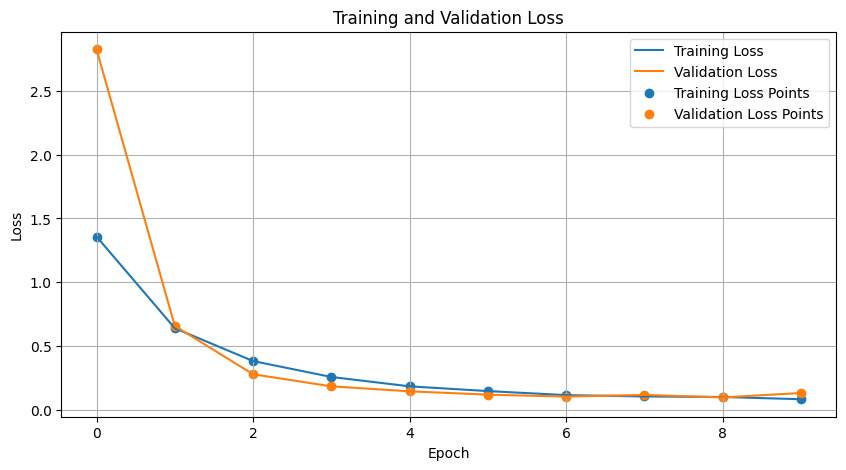

In [ ]:
# prompt: genrate history loss scatter plot

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.scatter(range(len(history.history['loss'])), history.history['loss'], label='Training Loss Points')
plt.scatter(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss Points')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

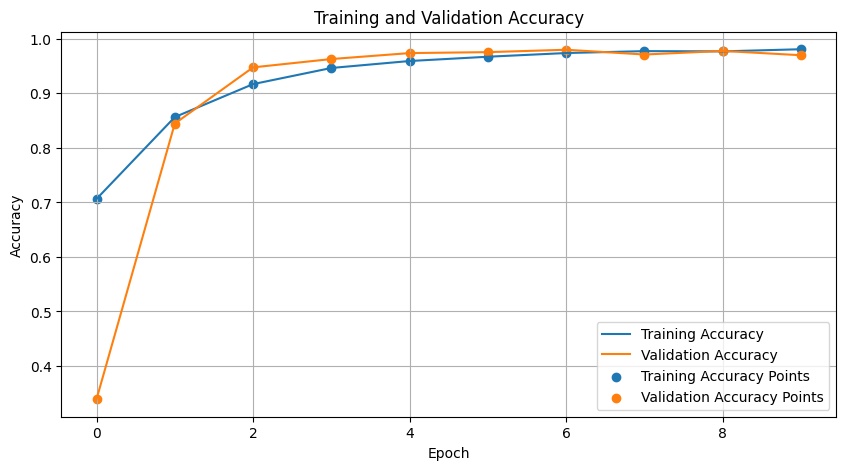

In [ ]:
# prompt: genrate history accuracy scatter plot

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.scatter(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy Points')
plt.scatter(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy Points')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()